Validation Accuracy: 0.8035899613
Validation Precision: 0.8035900698
Validation Recall: 0.8035899613
Validation F1-score: 0.8035899400


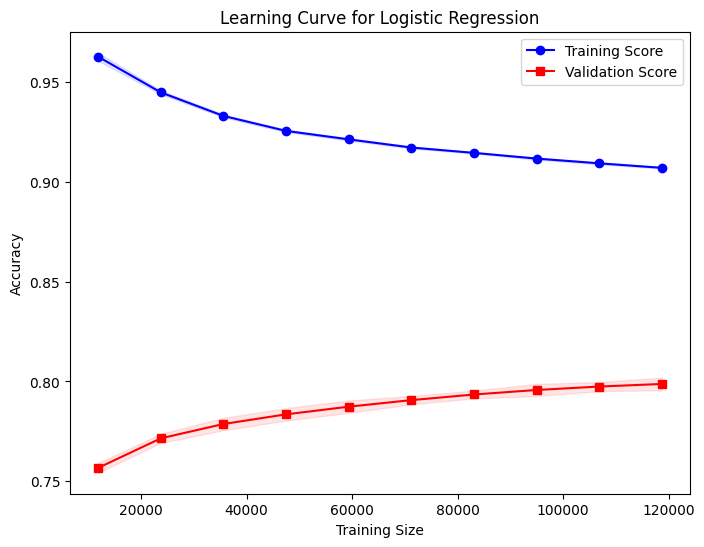

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text) 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\bur\b', 'your', text, flags=re.IGNORECASE)
    text = re.sub(r'\bu\b', 'you', text, flags=re.IGNORECASE)
    text = re.sub(r'\br\b', 'are', text, flags=re.IGNORECASE)
    text = re.sub(r'\bbrb\b', 'be right back', text, flags=re.IGNORECASE)
    text = re.sub(r'\bbtw\b', 'by the way', text, flags=re.IGNORECASE)
    text = re.sub(r'\blol\b', 'laughing out loud', text, flags=re.IGNORECASE)
    text = re.sub(r'\bomg\b', 'oh my god', text, flags=re.IGNORECASE)
    text = re.sub(r'\btmr\b', 'tomorrow', text, flags=re.IGNORECASE)
    text = re.sub(r'\bppl\b', 'people', text, flags=re.IGNORECASE)
    text = re.sub(r'\bidk\b', 'i do not know', text, flags=re.IGNORECASE)
    text = re.sub(r'\bimo\b', 'in my opinion', text, flags=re.IGNORECASE)
    text = re.sub(r'\bimho\b', 'in my humble opinion', text, flags=re.IGNORECASE)
    text = re.sub(r'\bwanna\b', 'want to', text, flags=re.IGNORECASE)
    text = re.sub(r'\bgonna\b', 'going to', text, flags=re.IGNORECASE)
    text = re.sub(r'\bgotta\b', 'got to', text, flags=re.IGNORECASE)
    text = re.sub(r'\bcuz\b', 'because', text, flags=re.IGNORECASE)
    text = re.sub(r'\bcoz\b', 'because', text, flags=re.IGNORECASE)
    text = re.sub(r'\bnvm\b', 'nevermind', text, flags=re.IGNORECASE)
    text = re.sub(r'\bya\b', 'yes', text, flags=re.IGNORECASE)
    text = re.sub(r'\byeah\b', 'yes', text, flags=re.IGNORECASE)
    text = re.sub(r'\blmk\b', 'let me know', text, flags=re.IGNORECASE)
    text = re.sub(r'\bttyl\b', 'talk to you later', text, flags=re.IGNORECASE)
    text = re.sub(r"\bi'm\b", "i am", text)
    text = re.sub(r"\bim\b", "i am", text)
    text = re.sub(r"\bdon't\b", "do not", text)
    text = re.sub(r"\bdont\b", "do not", text)
    text = re.sub(r"\bdoesn't\b", "does not", text)
    text = re.sub(r"\bdoesnt\b", "does not", text)
    text = re.sub(r"\bhaven't\b", "have not", text)
    text = re.sub(r"\bhavent\b", "have not", text)
    text = re.sub(r"\bhasn't\b", "has not", text)
    text = re.sub(r"\bhasnt\b", "has not", text)
    text = re.sub(r"\bcan't\b", "can not", text)
    text = re.sub(r"\bcant\b", "can not", text)
    text = re.sub(r"\bur\b", "you are", text)
    text = re.sub(r"\bure\b", "you are", text)
    return text

train_df = pd.read_csv("/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/train_dataset.csv")
val_df = pd.read_csv("/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/val_dataset.csv")
test_df = pd.read_csv("/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/test_dataset.csv")

# Apply cleaning function to datasets
train_df['Text'] = train_df['Text'].apply(preprocess_text)
val_df['Text'] = val_df['Text'].apply(preprocess_text)
test_df['Text'] = test_df['Text'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=300000, ngram_range=(1, 3), sublinear_tf=True)
train_tfidf = vectorizer.fit_transform(train_df['Text'])
val_tfidf = vectorizer.transform(val_df['Text'])
test_tfidf = vectorizer.transform(test_df['Text'])

#Train Logistic Regression model
model = LogisticRegression(C=2.0, max_iter=4000, random_state=42, solver='lbfgs')
model.fit(train_tfidf, train_df['Label'])

# Predictions
y_pred = model.predict(val_tfidf)

test_pred = model.predict(test_tfidf)
# DataFrame for submission
sub_df = pd.DataFrame({
    'ID': test_df['ID'],  
    'Label': test_pred  
})

# Save to CSV
sub_df.to_csv('/kaggle/working/submission.csv', index=False)


# Evaluation
accuracy = accuracy_score(val_df['Label'], y_pred)
precision = precision_score(val_df['Label'], y_pred, average='weighted')
recall = recall_score(val_df['Label'], y_pred, average='weighted')
f1 = f1_score(val_df['Label'], y_pred, average='weighted')


print(f'Validation Accuracy: {accuracy:.10f}')
print(f'Validation Precision: {precision:.10f}')
print(f'Validation Recall: {recall:.10f}')
print(f'Validation F1-score: {f1:.10f}')

# Leipei kwdikas
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, train_tfidf, train_df['Label'], cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean and std of accuracy
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")


plt.plot(train_sizes, test_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()